# Titanic Classification

Presented by Vaishnavi Nikam

In [1]:
#Importing Libraries 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()
data = sns.load_dataset("penguins")

In [3]:
#READ dataset 
data = pd.read_csv("C:/Users/Admin/Downloads/train.csv")

In [4]:
#Display Top 5 Rows of Dataset

In [5]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
#Display Last 5 Rows of Dataset

In [7]:
data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


**Find shape of dataset**

In [8]:
data.shape

(891, 12)

In [9]:
print("Number of Rows :",data.shape[0])
print("Number of Column :",data.shape[1])

Number of Rows : 891
Number of Column : 12


In [10]:
#Show columns in given dataset

In [11]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

**Check datatypes of each column**

In [12]:
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**Get overall statistics about the dataset**

In [13]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Check for NaN values i.e Not a number**

In [14]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**Replace null columns and check** 

In [15]:
data.dropna(inplace=True)

<Axes: >

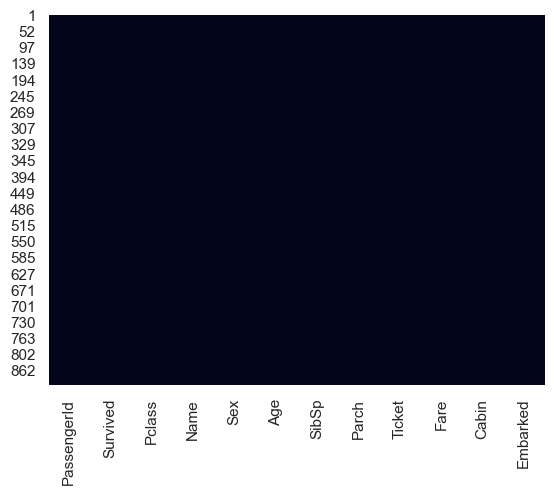

In [16]:
sns.heatmap(data.isnull(),cbar=False)

In [17]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

**Check for duplication of data**

In [18]:
data_dup=data.duplicated().any()
print(data_dup)

False


**Checking Socio Economic Status**

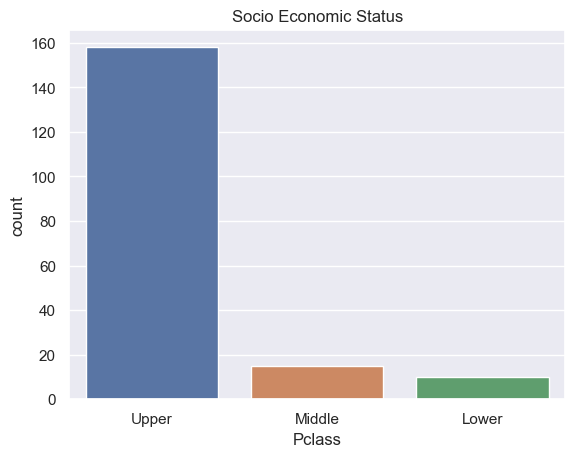

In [19]:
sns.countplot(x=data['Pclass'])
plt.xticks([0,1,2],['Upper','Middle','Lower'])
plt.title("Socio Economic Status")
plt.show()

**Checking Age Distribution**

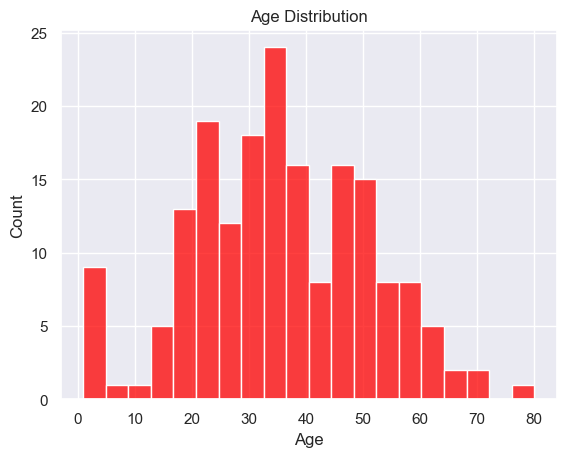

In [20]:
sns.histplot(data['Age'],bins=20, stat="count",color='red')
plt.title("Age Distribution")
plt.show()

**Checking Status of Survivance of people in given Dataset**

In [21]:
data['Survived'].value_counts()

1    123
0     60
Name: Survived, dtype: int64

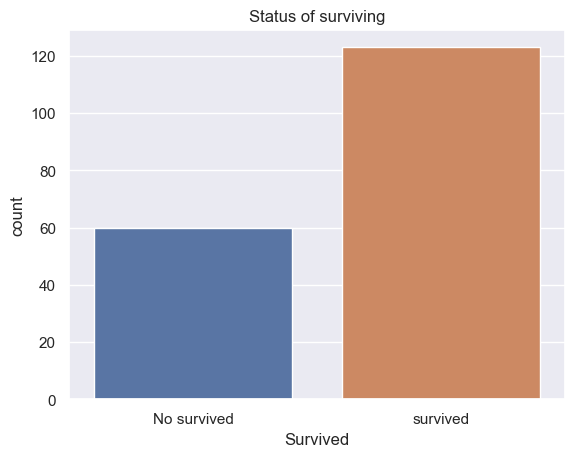

In [22]:
sns.countplot(x=data['Survived'])
plt.xticks([0,1],['No survived','survived'])
plt.title("Status of surviving")
plt.show()

**Checking Gender Distribution in Given Dataset**

In [23]:
data['Sex'].value_counts()

male      95
female    88
Name: Sex, dtype: int64

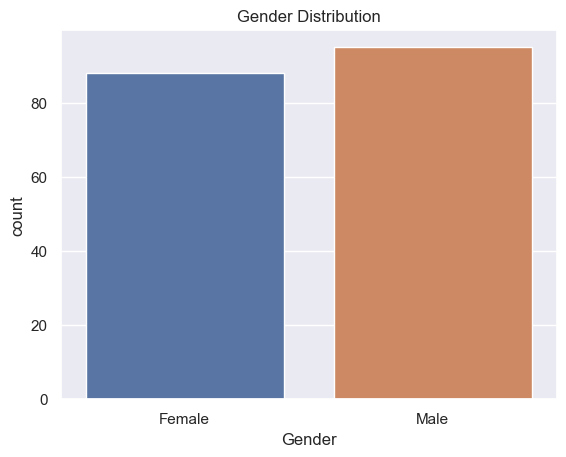

In [24]:
sns.countplot(x=data['Sex'])
plt.xticks([0,1],['Female','Male'])
plt.xlabel("Gender")
plt.title("Gender Distribution")
plt.show()

**Checking Status of Survivance of people on the basis of Gender**

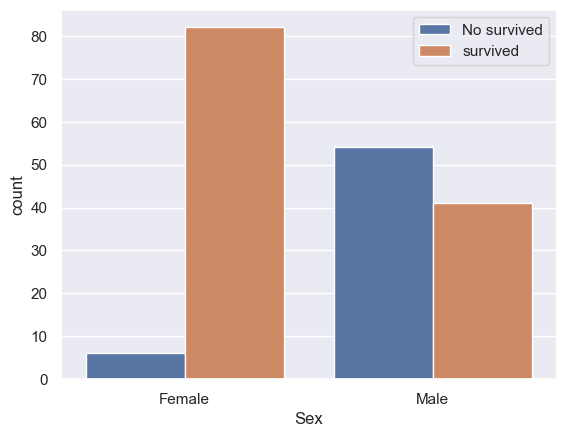

In [25]:
sns.countplot(x='Sex',hue='Survived',data=data)
plt.xticks([0,1],['Female','Male'])
plt.legend(labels=['No survived','survived'])
plt.show()

In [26]:
cat= data.groupby("Survived")["Sex"].value_counts().unstack()
cat

Sex,female,male
Survived,,
0,6,54
1,82,41


**Checking Status of Survivance of people with respect to Pclass**

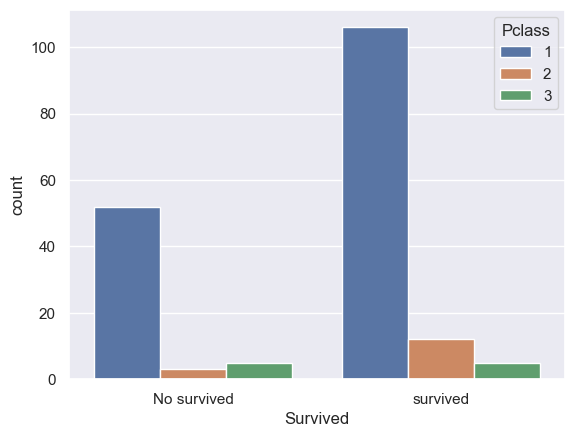

Survived,0,1
Pclass,,
1,52,106
2,3,12
3,5,5


In [27]:
sns.countplot(x='Survived',hue='Pclass',data=data)
plt.xticks([0,1],['No survived','survived'])
plt.show()
cat= data.groupby("Pclass")["Survived"].value_counts().unstack()
cat

**Checking Fare Distribution**

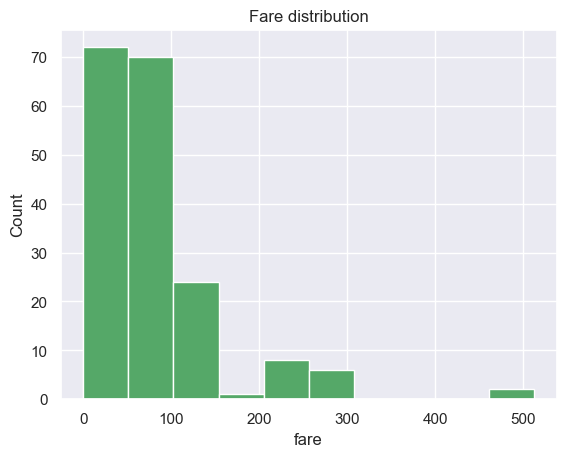

In [28]:
data['Fare'].hist(color='g')
plt.xlabel("fare")
plt.ylabel("Count")
plt.title("Fare distribution")
plt.show()

**Checking SibSp Distribution**

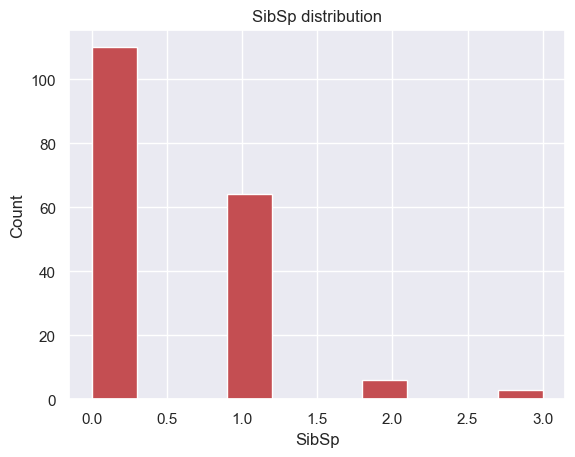

In [29]:
data['SibSp'].hist(color='r')
plt.xlabel("SibSp")
plt.ylabel("Count")
plt.title("SibSp distribution")
plt.show()

**Checking Status of Survivance of people with respect to SibSp**

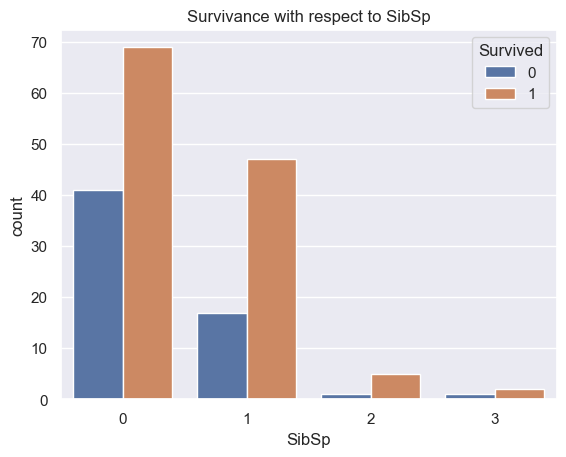

SibSp,0,1,2,3
Survived,,,,
0,41,17,1,1
1,69,47,5,2


In [30]:
sns.countplot(x='SibSp',hue='Survived',data=data)
plt.title("Survivance with respect to SibSp")
plt.show()
cat= data.groupby("Survived")["SibSp"].value_counts().unstack()
cat

**Checking Parch Distribution**

<Axes: xlabel='Parch', ylabel='count'>

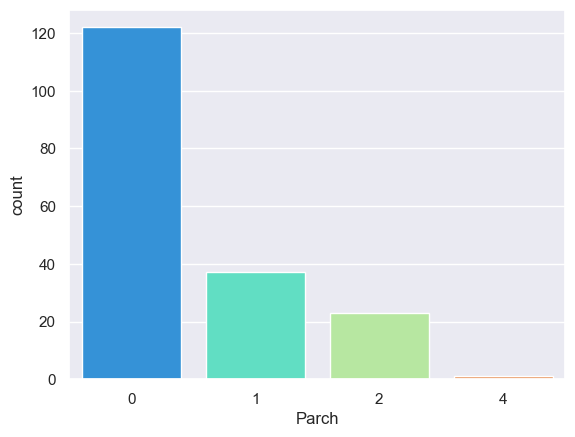

In [31]:
sns.countplot(x='Parch',data=data, palette='rainbow')

**Checking Status of Survivance of people with respect to Parch**

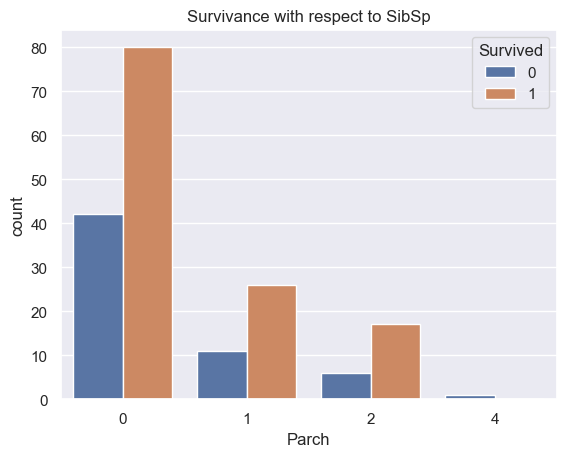

Parch,0,1,2,4
Survived,,,,
0,42.0,11.0,6.0,1.0
1,80.0,26.0,17.0,NaN


In [32]:
sns.countplot(x='Parch',hue='Survived',data=data)
plt.title("Survivance with respect to SibSp")
plt.show()
cat= data.groupby("Survived")["Parch"].value_counts().unstack()
cat

**Dropping Irrelavant Data**

In [33]:
data.drop(['Name','PassengerId','Ticket','Sex','Cabin','Embarked'],axis=1,inplace=True)

In [34]:
data.head(3)

,Survived,Pclass,Age,SibSp,Parch,Fare
1,1,1,38.0,1,0,71.2833
3,1,1,35.0,1,0,53.1000
6,0,1,54.0,0,0,51.8625


**Data Preprocessing**

In [35]:
cate_val=[]
cont_val=[]
for column in data.columns:
    if data[column].nunique()<=10:
        cate_val.append(column)
    else:
        cont_val.append(column)

In [36]:
cate_val

['Survived', 'Pclass', 'SibSp', 'Parch']

In [37]:
cont_val

['Age', 'Fare']

**Feature Scalling**

In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
data[cont_val]=sc.fit_transform(data[cont_val])
data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare
1,1,1,0.149065,1,0,-0.097180
3,1,1,-0.043230,1,0,-0.335997
6,0,1,1.174636,0,0,-0.352250
10,1,3,-2.030273,1,1,-0.814070
11,1,1,1.431029,0,0,-0.684702


**Encoding of Data**

In [39]:
cate_val.remove('Survived')
data=pd.get_dummies(data,columns=cate_val,drop_first=True)

In [40]:
data.head()

,Survived,Age,Fare,Pclass_2,Pclass_3,SibSp_1,SibSp_2,SibSp_3,Parch_1,Parch_2,Parch_4
1,1,0.149065,-0.097180,0,0,1,0,0,0,0,0
3,1,-0.043230,-0.335997,0,0,1,0,0,0,0,0
6,0,1.174636,-0.352250,0,0,0,0,0,0,0,0
10,1,-2.030273,-0.814070,0,1,1,0,0,1,0,0
11,1,1.431029,-0.684702,0,0,0,0,0,0,0,0


**Splitting Data into Traininng Set and Test Set**

In [41]:
X=data.drop('Survived',axis=1)
y=data['Survived']
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=10)

**Logistic Regression Model**

In [42]:
from sklearn.linear_model import LogisticRegression

In [43]:
log=LogisticRegression()
log.fit(X_train,y_train)

LogisticRegression()

In [44]:
y_pred=log.predict(X_test)

In [45]:
from sklearn.metrics import accuracy_score

In [46]:
accuracy_score(y_test,y_pred)

0.8108108108108109

**Support Vector Machine Model**

In [47]:
from sklearn import svm

In [48]:
svm=svm.SVC()

In [49]:
svm.fit(X_train,y_train)

SVC()

In [50]:
y_pred2=svm.predict(X_test)

In [51]:
accuracy_score(y_test,y_pred2)

0.8108108108108109

**Selecting Best Model based on Accuracy Score**

In [52]:
final=pd.DataFrame({'Models':['LR','SVM'],'ACC':[accuracy_score(y_test,y_pred),accuracy_score(y_test,y_pred2)]})
final

,Models,ACC
0,LR,0.810811
1,SVM,0.810811


<function matplotlib.pyplot.plot(*args, scalex=True, scaley=True, data=None, **kwargs)>

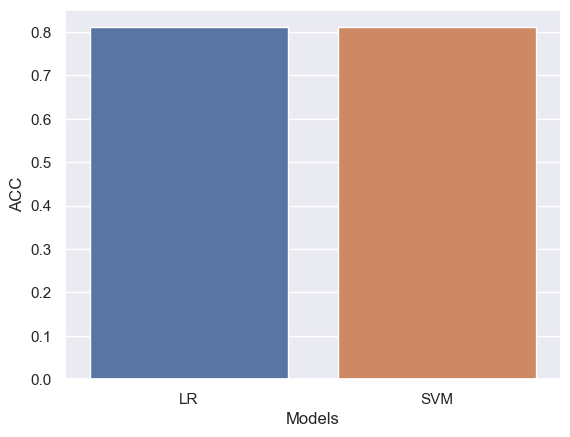

In [53]:
sns.barplot(x=final['Models'],y=final['ACC'])
plt.plot

**Using Support Vector Machine for Prediction**

In [54]:
X=data.drop('Survived',axis=1)
y=data['Survived']
from sklearn import svm
svm=svm.SVC()
svm.fit(X_train,y_train)

SVC()

**Prediction on New Data**

In [55]:
new=pd.DataFrame({
    'Pclass':3,
    'Age':40,
    'SibSp':1,
    'Parch':0,
    'Fare':71.5633,
},index=[0])

In [56]:
new

,Pclass,Age,SibSp,Parch,Fare
0,3,40,1,0,71.5633


In [58]:
new=new.reindex(columns=X.columns,fill_value=0)
p=svm.predict(new)
if p[0]==1:
    print("Person is Survived.")
else:
    print("Person is not Survived.")

Person is Survived.
